## Load results

In [1]:
import os
import glob
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pathlib import Path
import seaborn as sns
from importlib import reload

In [2]:
%matplotlib inline

In [3]:
current_dir = os.getcwd()
datadir = os.path.join(Path(current_dir).parents[1], "DimaERC2")
assert os.path.isdir(datadir)

In [4]:
datadir

'/home/vador/Documents/Theotime/DimaERC2'

In [5]:
# What Basile did
BasileMiceNumber = [
    "1239vBasile",
    "1281vBasile",
    "1199",
    "1336",
    "1168MFB",
    "905",
    "1161w1199",
    "1161",
    "1124",
    "1186",
    "1182",
    "1168UMaze",
    "1117",
    "994",
    "1336v3",
    "1336v2",
    "1281v2",
    "1239v3",
]

# What Dima did according to Baptiste
DimaMiceNumber = [
    "905",
    "906",
    "911",
    "994",
    "1161",
    "1162",
    "1168",
    "1186",
    "1230",
    "1239",
]

# Files wrt to datadir
path_list = [
    "M1239TEST3_Basile_M1239/TEST",
    "M1281TEST3_Basile_1281MFB/TEST",
    "M1199TEST1_Basile/TEST",
    "M1336_Known/TEST/",
    # "DataERC2/M994/20191013/TEST/",
    # "DataERC2/M906/TEST/",
    "DataERC2/M1168/TEST/",
    "DataERC2/M905/TEST/",
    "DataERC2/M1161/TEST_with_1199_model/",
    "DataERC2/M1161/TEST initial/",
    "DataERC2/M1124/TEST/",
    "DataERC2/M1186/TEST/",
    "DataERC2/M1182/TEST/",
    "DataERC1/M1168/TEST/",
    "DataERC1/M1117/TEST/",
    "neuroencoders_1021/_work/M994_PAG/Final_results_v3",
    "neuroencoders_1021/_work/M1336_MFB/Final_results_v3",
    "neuroencoders_1021/_work/M1336_known/Final_results_v2",
    "neuroencoders_1021/_work/M1281_MFB/Final_results_v2",
    "neuroencoders_1021/_work/M1239_MFB/Final_results_v3",
]
assert len(BasileMiceNumber) == len(path_list)
len(BasileMiceNumber)
path_dict = dict(zip(BasileMiceNumber, path_list))

In [6]:
# 1168MFB does not have any results
path_dict.pop("1168MFB")

'DataERC2/M1168/TEST/'

In [7]:
path_dict

{'1239vBasile': 'M1239TEST3_Basile_M1239/TEST',
 '1281vBasile': 'M1281TEST3_Basile_1281MFB/TEST',
 '1199': 'M1199TEST1_Basile/TEST',
 '1336': 'M1336_Known/TEST/',
 '905': 'DataERC2/M905/TEST/',
 '1161w1199': 'DataERC2/M1161/TEST_with_1199_model/',
 '1161': 'DataERC2/M1161/TEST initial/',
 '1124': 'DataERC2/M1124/TEST/',
 '1186': 'DataERC2/M1186/TEST/',
 '1182': 'DataERC2/M1182/TEST/',
 '1168UMaze': 'DataERC1/M1168/TEST/',
 '1117': 'DataERC1/M1117/TEST/',
 '994': 'neuroencoders_1021/_work/M994_PAG/Final_results_v3',
 '1336v3': 'neuroencoders_1021/_work/M1336_MFB/Final_results_v3',
 '1336v2': 'neuroencoders_1021/_work/M1336_known/Final_results_v2',
 '1281v2': 'neuroencoders_1021/_work/M1281_MFB/Final_results_v2',
 '1239v3': 'neuroencoders_1021/_work/M1239_MFB/Final_results_v3'}

In [8]:
def get_size(file_path, unit="bytes"):
    file_size = os.path.getsize(file_path)
    exponents_map = {"bytes": 0, "kb": 1, "mb": 2, "gb": 3}
    if unit not in exponents_map:
        raise ValueError(
            "Must select from \
        ['bytes', 'kb', 'mb', 'gb']"
        )
    else:
        size = file_size / 1024 ** exponents_map[unit]
        return round(size, 3)

In [9]:
keys_to_include = set()
size_dat = dict()
for mouse, path in path_dict.items():
    path = os.path.join(datadir, path, "../")
    if len(glob.glob(path + "*.dat")) >= 1:
        keys_to_include.add(mouse)
        size_dat[mouse] = get_size(glob.glob(path + "*.dat")[0], unit="gb")

dath_dict = {k: path_dict[k] for k in keys_to_include}

In [10]:
size_dat

{'1199': 0.36,
 '1336': 66.883,
 '1186': 58.163,
 '1182': 50.868,
 '1168UMaze': 60.133,
 '1117': 48.799,
 '994': 100.994,
 '1336v3': 68.974,
 '1336v2': 66.883,
 '1281v2': 63.311,
 '1239v3': 49.421}

In [11]:
conditions = {
    "MFB": ["1281vBasile", "1281v3" "1239vBasile", "1239v3", "1336v3", "1336v2"],
    "Known": ["1336", "1336v3"],
    "PAG": ["1186", "1161", "1161w1199", "1124", "1186", "1117", "1199", "994"],
    "Umaze": ["1199", "906", "1168", "905", "1182"],
    # WARNING: 994 has non-aligned nnbehavior.positions; hence the results should not be trusted
}

list_windows = [36, 108, 200, 252, 504]

In [12]:
import sys

sys.path.append("..")
from importData.rawdata_parser import DataHelper
from resultAnalysis.print_results import print_results

In [13]:
list_windows

[36, 108, 200, 252, 504]

In [14]:
# bypass to avoid heavy comput and fill the memory for nothing
force = False

todo = dict()
dirmouse = dict()
mouse_id = []
windowMS = []
mean_eucl = []
select_eucl = []
mean_lin = []
select_lin = []
has_dat = []
sizes = []
for mouse, path in path_dict.items():
    todo[mouse] = []
    returned = False
    dirmouse[mouse] = os.path.join(datadir, path, "results")
    assert os.path.isdir(dirmouse[mouse])
    for win in list_windows:
        try:
            mean, select, linmean, linselect = print_results(
                dirmouse[mouse], show=False, windowSizeMS=win, force=False
            )
            mean_eucl.append(mean)
            select_eucl.append(select)
            mean_lin.append(linmean)
            select_lin.append(linselect)
            mouse_id.append(mouse)
            windowMS.append(win)
            has_dat.append(mouse in dath_dict)
            if mouse in dath_dict:
                sizes.append(size_dat[mouse])
            else:
                sizes.append(0)
            returned = True
        except Exception as e:
            print(e)
            todo[mouse].append(win)
            print(f"Available windows: {os.listdir(dirmouse[mouse])}")
            for val in os.listdir(dirmouse[mouse]):
                if int(val) not in list_windows:
                    list_windows.append(val)
                    print(f"adding {val} to list of available windows")
                    mean, select, linmean, linselect = print_results(
                        dirmouse[mouse], show=False, windowSizeMS=win
                    )
                    mean_eucl.append(mean)
                    select_eucl.append(select)
                    mean_lin.append(linmean)
                    select_lin.append(linselect)
                    mouse_id.append(mouse)
                    windowMS.append(win)
                    returned = True
            ###" print(f"No data for {mouse} in {win}")
    if not returned:
        print(f"nothing at all for {mouse}, {os.listdir(dirmouse[mouse])}")


results_df = pd.DataFrame(
    data={
        "mouse_id": mouse_id,
        "windowMS": windowMS,
        "mean_eucl": mean_eucl,
        "select_eucl": select_eucl,
        "mean_lin": mean_lin,
        "select_lin": select_lin,
        "has_dat": has_dat,
        "size_dat": sizes,
    }
)

total windows: 103424 | selected windows: 31027 (thresh -4.3133297 )
mean eucl. error: 0.4099105329433457 | selected error: 0.3388784961711805
mean linear error: 0.24068852490717824 | selected error: 0.18432333129210043
[Errno 2] No such file or directory: '/home/vador/Documents/Theotime/DimaERC2/M1239TEST3_Basile_M1239/TEST/results/108/featureTrue.csv'
Available windows: ['200', '36', '504']
total windows: 21888 | selected windows: 6566 (thresh -4.140966 )
mean eucl. error: 0.3900984639396719 | selected error: 0.35825975326772563
mean linear error: 0.2728143274853801 | selected error: 0.21335820895522387
[Errno 2] No such file or directory: '/home/vador/Documents/Theotime/DimaERC2/M1239TEST3_Basile_M1239/TEST/results/252/featureTrue.csv'
Available windows: ['200', '36', '504']
total windows: 9856 | selected windows: 2956 (thresh -4.9398165 )
mean eucl. error: 0.38621183691339656 | selected error: 0.3790181510435826
mean linear error: 0.21885349025974027 | selected error: 0.18813261163

In [15]:
todo

{'1239vBasile': [108, 252],
 '1281vBasile': [108, 252],
 '1199': [36, 108, 252, 504],
 '1336': [108, 252],
 '905': [108, 252],
 '1161w1199': [36, 108, 252, 504],
 '1161': [108, 252],
 '1124': [36, 108, 252, 504],
 '1186': [108, 252],
 '1182': [36, 108, 252, 504],
 '1168UMaze': [108, 252],
 '1117': [108, 252],
 '994': [200],
 '1336v3': [200],
 '1336v2': [200],
 '1281v2': [200],
 '1239v3': [200]}

In [16]:
for cdt in conditions:
    for mouse in conditions[cdt]:
        try:
            results_df.loc[results_df.mouse_id == mouse, "condition"] = cdt
        except Exception as e:
            print(e)

results_df = results_df.sort_values(
    by=["condition", "mouse_id", "windowMS"]
).reset_index(drop=True)

<AxesSubplot: >

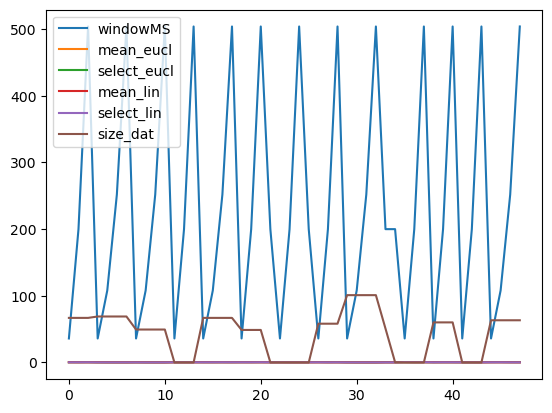

In [17]:
results_df.plot()

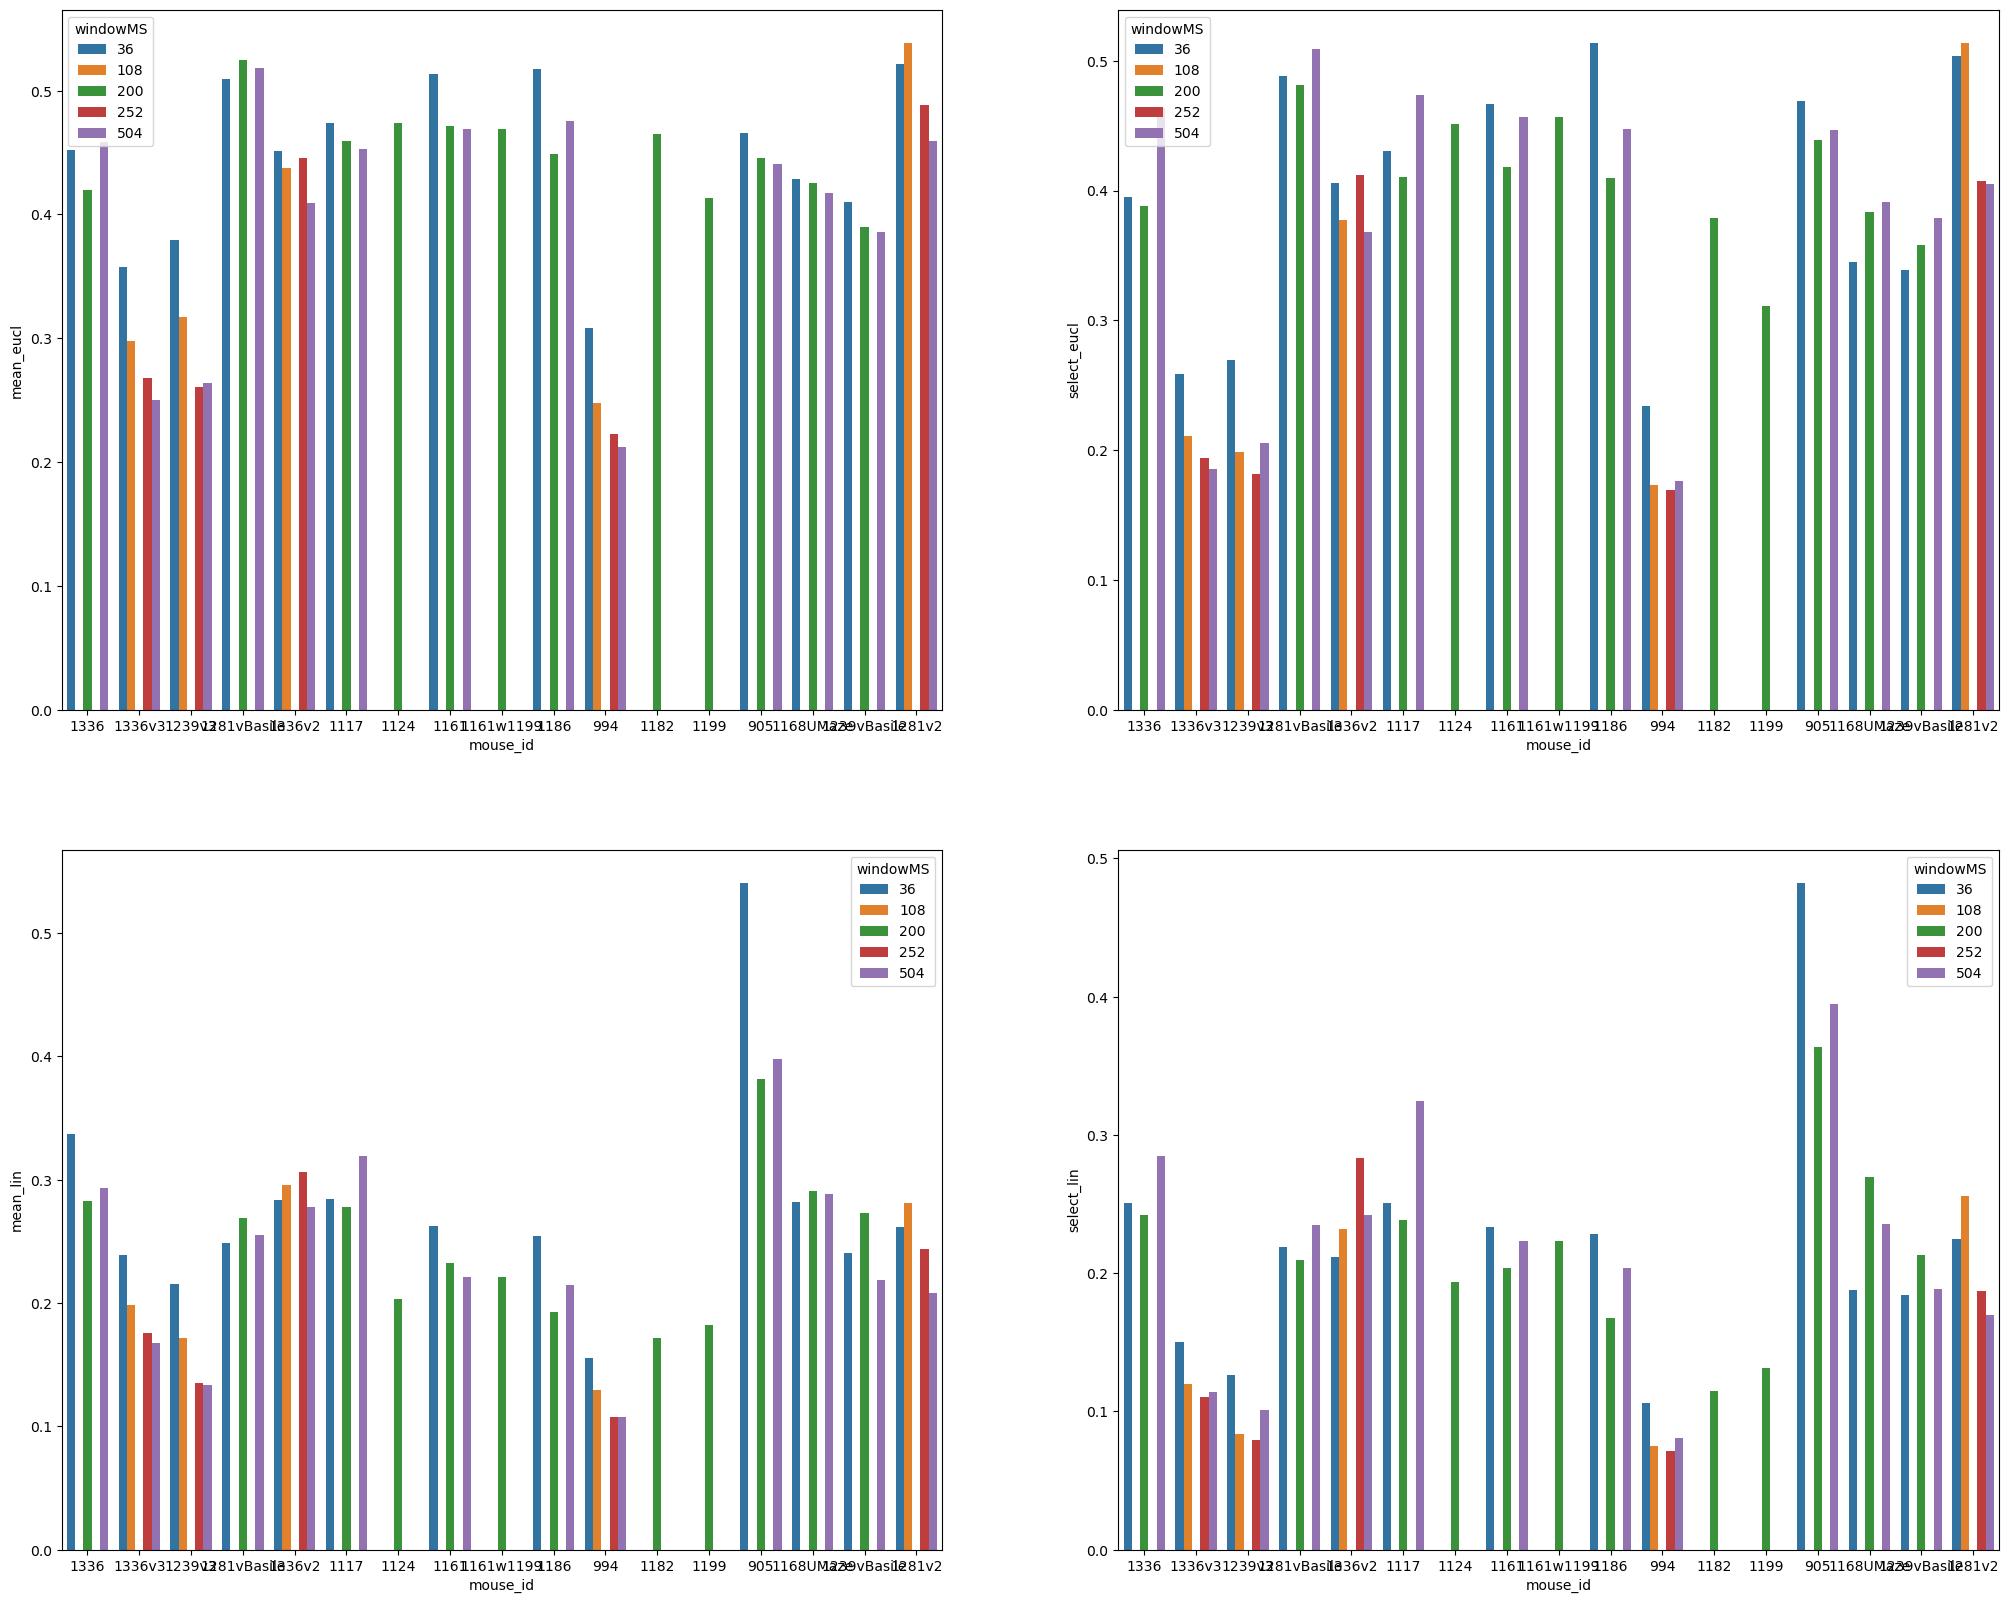

In [18]:
%matplotlib inline
fig, _axs = plt.subplots(2, 2, figsize=(25, 20))
axs = _axs.flatten()
for i, metric in enumerate(["mean_eucl", "select_eucl", "mean_lin", "select_lin"]):
    sns.barplot(hue="windowMS", y=metric, x="mouse_id", data=results_df, ax=axs[i])

## Let's focus on M994 and 12390 (good results, PAG & MFB, several windowMS)

In [19]:
selected_mice = ["994", "1239v3"]

In [20]:
subresults_df = results_df[results_df["mouse_id"].isin(selected_mice)]

<AxesSubplot: >

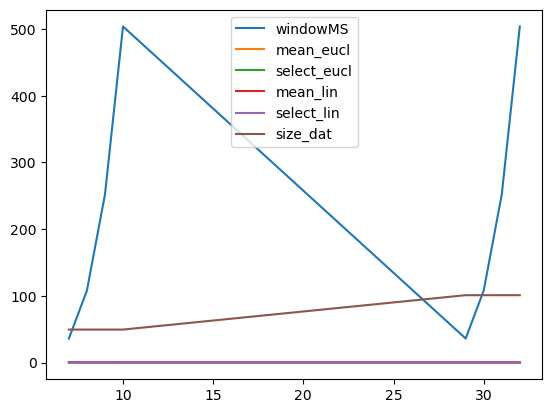

In [21]:
subresults_df.plot()

In [22]:
import spikeinterface as si
import spikeinterface.extractors as se
import spikeinterface.preprocessing as spre
import spikeinterface.postprocessing as spost
import spikeinterface.curation as scur
import spikeinterface.widgets as sw
import spikeinterface.qualitymetrics

In [23]:
dirmouse

{'1239vBasile': '/home/vador/Documents/Theotime/DimaERC2/M1239TEST3_Basile_M1239/TEST/results',
 '1281vBasile': '/home/vador/Documents/Theotime/DimaERC2/M1281TEST3_Basile_1281MFB/TEST/results',
 '1199': '/home/vador/Documents/Theotime/DimaERC2/M1199TEST1_Basile/TEST/results',
 '1336': '/home/vador/Documents/Theotime/DimaERC2/M1336_Known/TEST/results',
 '905': '/home/vador/Documents/Theotime/DimaERC2/DataERC2/M905/TEST/results',
 '1161w1199': '/home/vador/Documents/Theotime/DimaERC2/DataERC2/M1161/TEST_with_1199_model/results',
 '1161': '/home/vador/Documents/Theotime/DimaERC2/DataERC2/M1161/TEST initial/results',
 '1124': '/home/vador/Documents/Theotime/DimaERC2/DataERC2/M1124/TEST/results',
 '1186': '/home/vador/Documents/Theotime/DimaERC2/DataERC2/M1186/TEST/results',
 '1182': '/home/vador/Documents/Theotime/DimaERC2/DataERC2/M1182/TEST/results',
 '1168UMaze': '/home/vador/Documents/Theotime/DimaERC2/DataERC1/M1168/TEST/results',
 '1117': '/home/vador/Documents/Theotime/DimaERC2/Data

In [29]:
sorting_folder = dict()
from pathlib import Path

for mouse in selected_mice:
    sorting_folder[mouse] = (
        Path("/home/vador/Documents/Theotime/HDDocs") / f"tmp_spikesorting/{mouse}"
    )

In [30]:
sorting_folder

{'994': PosixPath('/home/vador/Documents/Theotime/HDDocs/tmp_spikesorting/994'),
 '1239v3': PosixPath('/home/vador/Documents/Theotime/HDDocs/tmp_spikesorting/1239v3')}